In [1]:
import pandas as pd
import numpy as np
import pyfpgrowth
%matplotlib inline
import matplotlib.pyplot as plt
import seaborn as sns
from mlxtend.frequent_patterns import apriori
from mlxtend.frequent_patterns import association_rules

In [2]:
df=pd.read_excel('D:\\Abhi reddy\\NMIT M.tech\\Online Retail.xlsx')

In [3]:
df.head()

,InvoiceNo,StockCode,Description,Quantity,InvoiceDate,UnitPrice,CustomerID,Country
0,536365,85123A,WHITE HANGING HEART T-LIGHT HOLDER,6,2010-12-01 08:26:00,2.55,17850.0,United Kingdom
1,536365,71053,WHITE METAL LANTERN,6,2010-12-01 08:26:00,3.39,17850.0,United Kingdom
2,536365,84406B,CREAM CUPID HEARTS COAT HANGER,8,2010-12-01 08:26:00,2.75,17850.0,United Kingdom
3,536365,84029G,KNITTED UNION FLAG HOT WATER BOTTLE,6,2010-12-01 08:26:00,3.39,17850.0,United Kingdom
4,536365,84029E,RED WOOLLY HOTTIE WHITE HEART.,6,2010-12-01 08:26:00,3.39,17850.0,United Kingdom


In [4]:
df.shape

(541909, 8)

In [5]:
df.isnull().sum()

InvoiceNo           0
StockCode           0
Description      1454
Quantity            0
InvoiceDate         0
UnitPrice           0
CustomerID     135080
Country             0
dtype: int64

In [6]:
df.dropna(axis=0, inplace=True)
df.isnull().sum()

InvoiceNo      0
StockCode      0
Description    0
Quantity       0
InvoiceDate    0
UnitPrice      0
CustomerID     0
Country        0
dtype: int64

In [7]:
dupes=df.duplicated()
sum(dupes)

5225

In [8]:
df1=df.drop_duplicates()
dupes=df1.duplicated()
sum(dupes)

0

In [9]:
def check_df(dataframe):
    print("##################### Info #####################")
    print(dataframe.info())
    print("##################### NA #####################")
    print(dataframe.isnull().sum())
    print("##################### Quantiles #####################")
    print(dataframe.describe([0, 0.05, 0.50, 0.95, 0.99, 1]).T)
check_df(df1)

##################### Info #####################
<class 'pandas.core.frame.DataFrame'>
Int64Index: 401604 entries, 0 to 541908
Data columns (total 8 columns):
 #   Column       Non-Null Count   Dtype         
---  ------       --------------   -----         
 0   InvoiceNo    401604 non-null  object        
 1   StockCode    401604 non-null  object        
 2   Description  401604 non-null  object        
 3   Quantity     401604 non-null  int64         
 4   InvoiceDate  401604 non-null  datetime64[ns]
 5   UnitPrice    401604 non-null  float64       
 6   CustomerID   401604 non-null  float64       
 7   Country      401604 non-null  object        
dtypes: datetime64[ns](1), float64(2), int64(1), object(4)
memory usage: 27.6+ MB
None
##################### NA #####################
InvoiceNo      0
StockCode      0
Description    0
Quantity       0
InvoiceDate    0
UnitPrice      0
CustomerID     0
Country        0
dtype: int64
##################### Quantiles #####################
    

In [10]:
def outlier_thresholds(dataframe, variable):
    quartile1 = dataframe[variable].quantile(0.01)
    quartile3 = dataframe[variable].quantile(0.99)
    interquantile_range = quartile3 - quartile1
    up_limit = quartile3 + 1.5 * interquantile_range
    low_limit = quartile1 - 1.5 * interquantile_range
    return low_limit, up_limit


def replace_with_thresholds(dataframe, variable):
    low_limit, up_limit = outlier_thresholds(dataframe, variable)
    dataframe.loc[(dataframe[variable] > up_limit), variable] = up_limit

replace_with_thresholds(df1, "Quantity")
replace_with_thresholds(df1, "UnitPrice")

df1.describe([0, 0.05, 0.50, 0.95, 0.99, 1]).T

C:\Users\Dell\anaconda3\lib\site-packages\pandas\core\indexing.py:1765: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  isetter(loc, value)
C:\Users\Dell\anaconda3\lib\site-packages\pandas\core\indexing.py:1765: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  isetter(loc, value)


,count,mean,std,min,0%,5%,50%,95%,99%,100%,max
Quantity,401604.0,11.019223,176.191356,-80995.0,-80995.0,1.00,5.00,36.0,120.0,303.000,303.000
UnitPrice,401604.0,2.941371,3.345005,0.0,0.0,0.42,1.95,8.5,15.0,37.185,37.185
CustomerID,401604.0,15281.160818,1714.006089,12346.0,12346.0,12621.00,15145.00,17898.0,18212.0,18287.000,18287.000


In [18]:
country_transaction = df1['Country'].value_counts().head()

Text(0, 0.5, 'Number of Transaction')

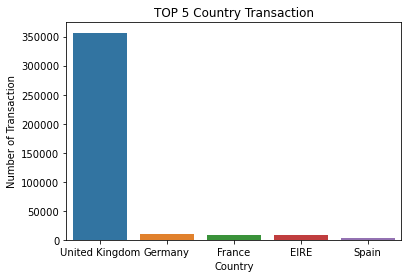

In [19]:
sns.barplot(x=country_transaction.index, y=country_transaction.values)
plt.title('TOP 5 Country Transaction')
plt.xlabel('Country')
plt.ylabel('Number of Transaction')

In [22]:
numb_country = df1['Country'].nunique()
print(f'Dari data tersebut ada sebanyak {numb_country} negara.')
country = pd.DataFrame(df1['Country'].value_counts()).reset_index()
country.columns = ['Country', 'Numb of Transaction']
country

Dari data tersebut ada sebanyak 37 negara.


,Country,Numb of Transaction
0,United Kingdom,356728
1,Germany,9480
2,France,8475
3,EIRE,7475
4,Spain,2528
5,Netherlands,2371
6,Belgium,2069
7,Switzerland,1877
8,Portugal,1471
9,Australia,1258


In [23]:
country_customer = df1[['Country', 'CustomerID']].groupby(['Country'])
country_customer = country_customer.agg({'CustomerID':'nunique'})
country_customer.sort_values(by='CustomerID', ascending=False).reset_index()

,Country,CustomerID
0,United Kingdom,3950
1,Germany,95
2,France,87
3,Spain,31
4,Belgium,25
5,Switzerland,21
6,Portugal,19
7,Italy,15
8,Finland,12
9,Austria,11


In [28]:
quantity_under_zero = df1[df1['Quantity']<0]
quantity_under_zero

,InvoiceNo,StockCode,Description,Quantity,InvoiceDate,UnitPrice,CustomerID,Country
141,C536379,D,Discount,-1.0,2010-12-01 09:41:00,27.500,14527.0,United Kingdom
154,C536383,35004C,SET OF 3 COLOURED FLYING DUCKS,-1.0,2010-12-01 09:49:00,4.650,15311.0,United Kingdom
235,C536391,22556,PLASTERS IN TIN CIRCUS PARADE,-12.0,2010-12-01 10:24:00,1.650,17548.0,United Kingdom
236,C536391,21984,PACK OF 12 PINK PAISLEY TISSUES,-24.0,2010-12-01 10:24:00,0.290,17548.0,United Kingdom
237,C536391,21983,PACK OF 12 BLUE PAISLEY TISSUES,-24.0,2010-12-01 10:24:00,0.290,17548.0,United Kingdom
...,...,...,...,...,...,...,...,...
540449,C581490,23144,ZINC T-LIGHT HOLDER STARS SMALL,-11.0,2011-12-09 09:57:00,0.830,14397.0,United Kingdom
541541,C581499,M,Manual,-1.0,2011-12-09 10:28:00,37.185,15498.0,United Kingdom
541715,C581568,21258,VICTORIAN SEWING BOX LARGE,-5.0,2011-12-09 11:57:00,10.950,15311.0,United Kingdom
541716,C581569,84978,HANGING HEART JAR T-LIGHT HOLDER,-1.0,2011-12-09 11:58:00,1.250,17315.0,United Kingdom


In [29]:
quantity_under_zero[['Description', 'Quantity']].groupby(['Description']).sum().sort_values(by=['Quantity']).head()

,Quantity
Description,
"PAPER CRAFT , LITTLE BIRDIE",-80995.0
MEDIUM CERAMIC TOP STORAGE JAR,-74494.0
ROTATING SILVER ANGELS T-LIGHT HLDR,-9367.0
Manual,-3995.0
FAIRY CAKE FLANNEL ASSORTED COLOUR,-3150.0


In [30]:
new_retail_online = df1.drop(quantity_under_zero.index, axis=0).reset_index(drop=True)
new_retail_online

,InvoiceNo,StockCode,Description,Quantity,InvoiceDate,UnitPrice,CustomerID,Country
0,536365,85123A,WHITE HANGING HEART T-LIGHT HOLDER,6.0,2010-12-01 08:26:00,2.55,17850.0,United Kingdom
1,536365,71053,WHITE METAL LANTERN,6.0,2010-12-01 08:26:00,3.39,17850.0,United Kingdom
2,536365,84406B,CREAM CUPID HEARTS COAT HANGER,8.0,2010-12-01 08:26:00,2.75,17850.0,United Kingdom
3,536365,84029G,KNITTED UNION FLAG HOT WATER BOTTLE,6.0,2010-12-01 08:26:00,3.39,17850.0,United Kingdom
4,536365,84029E,RED WOOLLY HOTTIE WHITE HEART.,6.0,2010-12-01 08:26:00,3.39,17850.0,United Kingdom
...,...,...,...,...,...,...,...,...
392727,581587,22613,PACK OF 20 SPACEBOY NAPKINS,12.0,2011-12-09 12:50:00,0.85,12680.0,France
392728,581587,22899,CHILDREN'S APRON DOLLY GIRL,6.0,2011-12-09 12:50:00,2.10,12680.0,France
392729,581587,23254,CHILDRENS CUTLERY DOLLY GIRL,4.0,2011-12-09 12:50:00,4.15,12680.0,France
392730,581587,23255,CHILDRENS CUTLERY CIRCUS PARADE,4.0,2011-12-09 12:50:00,4.15,12680.0,France


In [32]:
new_retail_online['TotalAmount'] = new_retail_online['Quantity'] * new_retail_online['UnitPrice']
new_retail_online['TotalAmount']

0         15.30
1         20.34
2         22.00
3         20.34
4         20.34
          ...  
392727    10.20
392728    12.60
392729    16.60
392730    16.60
392731    14.85
Name: TotalAmount, Length: 392732, dtype: float64

In [33]:
new_retail_online.drop(new_retail_online[['Quantity', 'UnitPrice']], axis=1, inplace=True)

In [36]:
new_retail_online['Date'] = [d.date() for d in new_retail_online['InvoiceDate']]
new_retail_online.drop(new_retail_online[['InvoiceDate']], axis=1, inplace=True)
new_retail_online['Date'] = pd.to_datetime(new_retail_online['Date'])

In [37]:
new_retail_online = new_retail_online[['Date', 'InvoiceNo', 'StockCode', 'Description', 
                                       'CustomerID', 'Country', 'TotalAmount']]
new_retail_online.head()

,Date,InvoiceNo,StockCode,Description,CustomerID,Country,TotalAmount
0,2010-12-01,536365,85123A,WHITE HANGING HEART T-LIGHT HOLDER,17850.0,United Kingdom,15.30
1,2010-12-01,536365,71053,WHITE METAL LANTERN,17850.0,United Kingdom,20.34
2,2010-12-01,536365,84406B,CREAM CUPID HEARTS COAT HANGER,17850.0,United Kingdom,22.00
3,2010-12-01,536365,84029G,KNITTED UNION FLAG HOT WATER BOTTLE,17850.0,United Kingdom,20.34
4,2010-12-01,536365,84029E,RED WOOLLY HOTTIE WHITE HEART.,17850.0,United Kingdom,20.34


In [38]:
new_retail_online = new_retail_online[['Date', 'TotalAmount']].groupby(['Date'])
new_retail_online = new_retail_online.agg({'TotalAmount': 'sum'}).reset_index()
new_retail_online.head()

,Date,TotalAmount
0,2010-12-01,44793.300
1,2010-12-02,44322.980
2,2010-12-03,23689.080
3,2010-12-05,31258.735
4,2010-12-06,30285.300


Text(0, 0.5, 'TotalAmount')

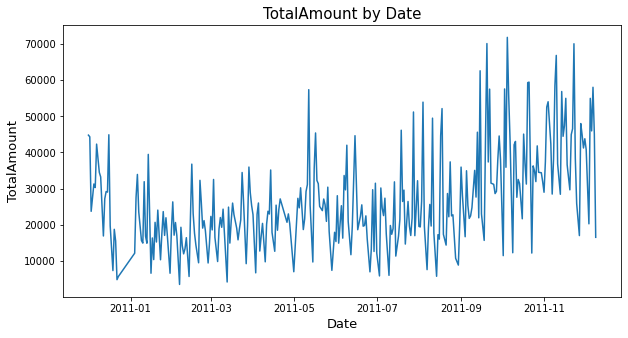

In [40]:
plt.figure(figsize=(10,5))
sns.lineplot(data=new_retail_online, x=new_retail_online['Date'], y=new_retail_online['TotalAmount'])
plt.title('TotalAmount by Date', fontsize=15)
plt.xlabel('Date', fontsize=13)
plt.ylabel('TotalAmount', fontsize=13)

In [41]:
basket = (df1[df1['Country'] =="France"]
          .groupby(['InvoiceNo', 'Description'])['Quantity']
          .sum().unstack().reset_index().fillna(0)
          .set_index('InvoiceNo'))
basket.head()

Description,50'S CHRISTMAS GIFT BAG LARGE,DOLLY GIRL BEAKER,I LOVE LONDON MINI BACKPACK,NINE DRAWER OFFICE TIDY,SET 2 TEA TOWELS I LOVE LONDON,SPACEBOY BABY GIFT SET,TRELLIS COAT RACK,10 COLOUR SPACEBOY PEN,12 COLOURED PARTY BALLOONS,12 EGG HOUSE PAINTED WOOD,...,WRAP SUKI AND FRIENDS,WRAP VINTAGE PETALS DESIGN,YELLOW COAT RACK PARIS FASHION,YELLOW GIANT GARDEN THERMOMETER,ZINC STAR T-LIGHT HOLDER,ZINC FOLKART SLEIGH BELLS,ZINC HERB GARDEN CONTAINER,ZINC METAL HEART DECORATION,ZINC T-LIGHT HOLDER STAR LARGE,ZINC T-LIGHT HOLDER STARS SMALL
InvoiceNo,,,,,,,,,,,,,,,,,,,,,
536370,0.0,0.0,0.0,0.0,24.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
536852,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
536974,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
537065,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
537463,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0


In [42]:
def encode_units(x):
    if x <= 0:
        return 0
    if x >= 1:
        return 1

basket_sets = basket.applymap(encode_units)

In [59]:
frequent_itemsets = apriori(basket_sets, min_support=0.07, use_colnames=True)
frequent_itemsets

,support,itemsets
0,0.082969,(ALARM CLOCK BAKELIKE GREEN)
1,0.087336,(ALARM CLOCK BAKELIKE PINK)
2,0.080786,(ALARM CLOCK BAKELIKE RED )
3,0.085153,(DOLLY GIRL LUNCH BOX)
4,0.082969,(JUMBO BAG RED RETROSPOT)
...,...,...
62,0.072052,"(PLASTERS IN TIN WOODLAND ANIMALS, PLASTERS IN..."
63,0.072052,"(POSTAGE, SET/6 RED SPOTTY PAPER CUPS, SET/20 ..."
64,0.072052,"(POSTAGE, SET/6 RED SPOTTY PAPER PLATES, SET/2..."
65,0.087336,"(POSTAGE, SET/6 RED SPOTTY PAPER PLATES, SET/6..."


In [58]:
rules = association_rules(frequent_itemsets, metric="lift", min_threshold=1)
rules.head()

,antecedents,consequents,antecedent support,consequent support,support,confidence,lift,leverage,conviction
0,(POSTAGE),(ALARM CLOCK BAKELIKE GREEN),0.655022,0.082969,0.072052,0.110000,1.325789,0.017706,1.030371
1,(ALARM CLOCK BAKELIKE GREEN),(POSTAGE),0.082969,0.655022,0.072052,0.868421,1.325789,0.017706,2.621834
2,(POSTAGE),(ALARM CLOCK BAKELIKE PINK),0.655022,0.087336,0.076419,0.116667,1.335833,0.019212,1.033204
3,(ALARM CLOCK BAKELIKE PINK),(POSTAGE),0.087336,0.655022,0.076419,0.875000,1.335833,0.019212,2.759825
4,(POSTAGE),(ALARM CLOCK BAKELIKE RED ),0.655022,0.080786,0.074236,0.113333,1.402883,0.021319,1.036707


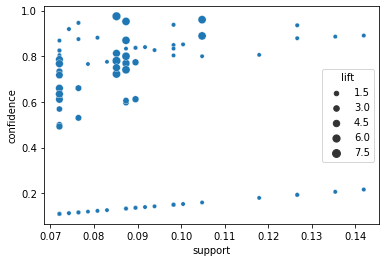

In [45]:
sns.scatterplot(x = "support", y = "confidence", 
                size = "lift", data = rules)
plt.show()

In [46]:
rules[ (rules['lift'] >= 6) &
       (rules['confidence'] >= 0.8) ]

,antecedents,consequents,antecedent support,consequent support,support,confidence,lift,leverage,conviction
58,(SET/6 RED SPOTTY PAPER PLATES),(SET/6 RED SPOTTY PAPER CUPS),0.109170,0.117904,0.104803,0.960000,8.142222,0.091932,22.052402
59,(SET/6 RED SPOTTY PAPER CUPS),(SET/6 RED SPOTTY PAPER PLATES),0.117904,0.109170,0.104803,0.888889,8.142222,0.091932,8.017467
84,"(POSTAGE, SET/6 RED SPOTTY PAPER PLATES)",(SET/6 RED SPOTTY PAPER CUPS),0.091703,0.117904,0.087336,0.952381,8.077601,0.076524,18.524017
85,"(POSTAGE, SET/6 RED SPOTTY PAPER CUPS)",(SET/6 RED SPOTTY PAPER PLATES),0.100437,0.109170,0.087336,0.869565,7.965217,0.076372,6.829694
90,"(SET/6 RED SPOTTY PAPER PLATES, SET/6 RED SPOT...",(SET/20 RED RETROSPOT PAPER NAPKINS ),0.104803,0.113537,0.085153,0.812500,7.156250,0.073254,4.727802
91,"(SET/6 RED SPOTTY PAPER PLATES, SET/20 RED RET...",(SET/6 RED SPOTTY PAPER CUPS),0.087336,0.117904,0.085153,0.975000,8.269444,0.074856,35.283843
92,"(SET/6 RED SPOTTY PAPER CUPS, SET/20 RED RETRO...",(SET/6 RED SPOTTY PAPER PLATES),0.087336,0.109170,0.085153,0.975000,8.931000,0.075618,35.633188


In [49]:
basket2 = (df1[df1['Country'] =="Germany"]
          .groupby(['InvoiceNo', 'Description'])['Quantity']
          .sum().unstack().reset_index().fillna(0)
          .set_index('InvoiceNo'))
basket2.head()

Description,50'S CHRISTMAS GIFT BAG LARGE,DOLLY GIRL BEAKER,I LOVE LONDON MINI BACKPACK,RED SPOT GIFT BAG LARGE,SET 2 TEA TOWELS I LOVE LONDON,SPACEBOY BABY GIFT SET,10 COLOUR SPACEBOY PEN,12 COLOURED PARTY BALLOONS,12 IVORY ROSE PEG PLACE SETTINGS,12 MESSAGE CARDS WITH ENVELOPES,...,YULETIDE IMAGES GIFT WRAP SET,ZINC HEART T-LIGHT HOLDER,ZINC STAR T-LIGHT HOLDER,ZINC BOX SIGN HOME,ZINC FOLKART SLEIGH BELLS,ZINC HEART LATTICE T-LIGHT HOLDER,ZINC METAL HEART DECORATION,ZINC T-LIGHT HOLDER STAR LARGE,ZINC T-LIGHT HOLDER STARS SMALL,ZINC WILLIE WINKIE CANDLE STICK
InvoiceNo,,,,,,,,,,,,,,,,,,,,,
536527,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
536840,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
536861,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
536967,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
536983,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0


In [50]:
basket_sets2 = basket2.applymap(encode_units)
frequent_itemsets2 = apriori(basket_sets2, min_support=0.05, use_colnames=True)
rules2 = association_rules(frequent_itemsets2, metric="lift", min_threshold=1)

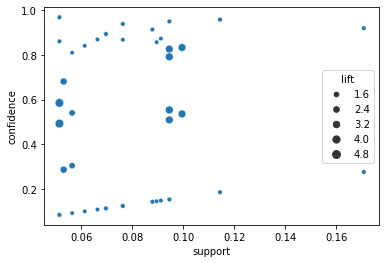

In [51]:
sns.scatterplot(x = "support", y = "confidence", 
                size = "lift", data = rules2)
plt.show()

In [52]:
rules2[ (rules2['lift'] >= 4) & (rules2['confidence'] >= 0.5)]

,antecedents,consequents,antecedent support,consequent support,support,confidence,lift,leverage,conviction
9,(PLASTERS IN TIN CIRCUS PARADE ),(PLASTERS IN TIN WOODLAND ANIMALS),0.087894,0.104478,0.051410,0.584906,5.598383,0.042227,2.157395
34,(ROUND SNACK BOXES SET OF 4 FRUITS ),(ROUND SNACK BOXES SET OF4 WOODLAND ),0.119403,0.185738,0.099502,0.833333,4.486607,0.077325,4.885572
35,(ROUND SNACK BOXES SET OF4 WOODLAND ),(ROUND SNACK BOXES SET OF 4 FRUITS ),0.185738,0.119403,0.099502,0.535714,4.486607,0.077325,1.896670
38,"(POSTAGE, ROUND SNACK BOXES SET OF 4 FRUITS )",(ROUND SNACK BOXES SET OF4 WOODLAND ),0.114428,0.185738,0.094527,0.826087,4.447593,0.073274,4.682007
39,"(POSTAGE, ROUND SNACK BOXES SET OF4 WOODLAND )",(ROUND SNACK BOXES SET OF 4 FRUITS ),0.170813,0.119403,0.094527,0.553398,4.634709,0.074132,1.971772
42,(ROUND SNACK BOXES SET OF 4 FRUITS ),"(POSTAGE, ROUND SNACK BOXES SET OF4 WOODLAND )",0.119403,0.170813,0.094527,0.791667,4.634709,0.074132,3.980100
43,(ROUND SNACK BOXES SET OF4 WOODLAND ),"(POSTAGE, ROUND SNACK BOXES SET OF 4 FRUITS )",0.185738,0.114428,0.094527,0.508929,4.447593,0.073274,1.803347


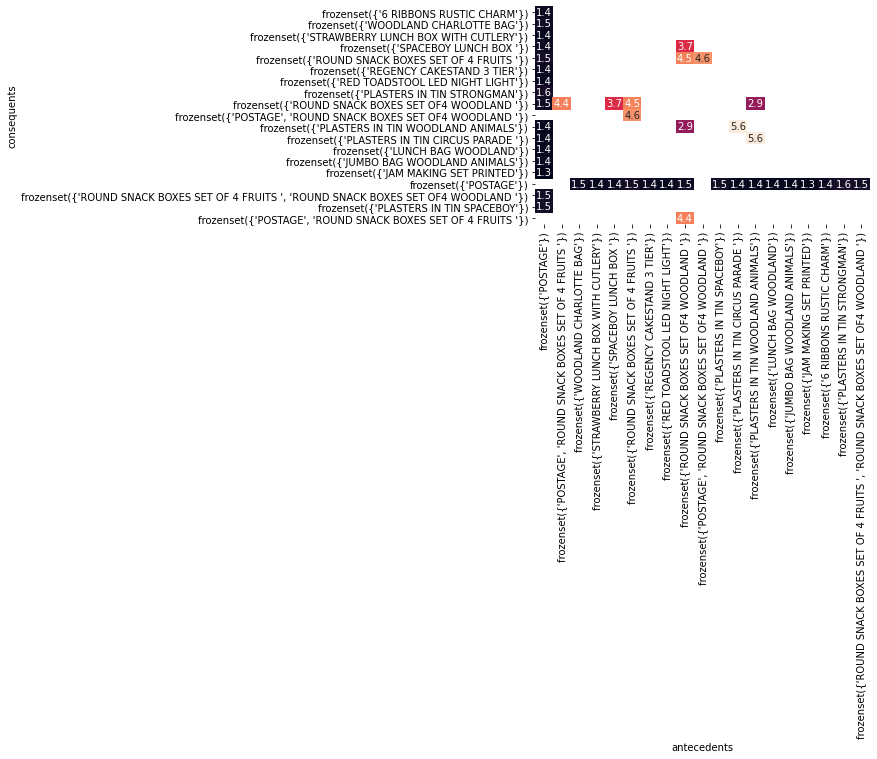

In [53]:
pivot = rules2.pivot(index = 'consequents', columns = 'antecedents', values= 'lift')
sns.heatmap(pivot, annot = True, cbar=False)
plt.yticks(rotation=0)
plt.xticks(rotation=90)
plt.show()

In [54]:
diff_min = df1.groupby('Description').mean().abs()
count  = df1.groupby('Description').count()
count.head()

,InvoiceNo,StockCode,Quantity,InvoiceDate,UnitPrice,CustomerID,Country
Description,,,,,,,
4 PURPLE FLOCK DINNER CANDLES,37,37,37,37,37,37,37
50'S CHRISTMAS GIFT BAG LARGE,110,110,110,110,110,110,110
DOLLY GIRL BEAKER,137,137,137,137,137,137,137
I LOVE LONDON MINI BACKPACK,69,69,69,69,69,69,69
I LOVE LONDON MINI RUCKSACK,1,1,1,1,1,1,1


In [55]:
diff_min['counts'] = count.Quantity
diff_min['counts'].head()

Description
 4 PURPLE FLOCK DINNER CANDLES     37
 50'S CHRISTMAS GIFT BAG LARGE    110
 DOLLY GIRL BEAKER                137
 I LOVE LONDON MINI BACKPACK       69
 I LOVE LONDON MINI RUCKSACK        1
Name: counts, dtype: int64